In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import datarail.utils.plate_fcts as pltfct
import datarail.data_processing.drug_response.qc_plate as qcfct
import datarail.import_modules.columbus_import_functions as CoImp
import datarail.data_processing.drug_response.treatment_annotation as TrtAnnot
import datarail.utils.drug_treatment as drgtrt
    
import matplotlib.pyplot as plt
%matplotlib inline



# load the synthetic data (Columbus output)
df = CoImp.Columbus_processing('../tests/drug_response_data/OUTPUT/Example1_Columbus_output.tsv')
# alternatively, one can load already processed and annotated data:
#       df = pd.read_csv('../tests/drug_response_data/OUTPUT/Example1_biased_results.tsv', sep='\t')

df.head()

Default number of fields: 6 ; 598 wells with missing field(s)


,barcode,date,Row,Column,well,cell_count,cell_count__total,corpse_count,cell_count__dead
0,MH1_01,2016-06-06 12:34:56,2,3,B03,491.0,531.0,28.0,40.0
1,MH1_01,2016-06-06 12:34:56,2,4,B04,482.0,521.0,27.0,39.0
2,MH1_01,2016-06-06 12:34:56,2,5,B05,516.0,555.0,26.0,39.0
3,MH1_01,2016-06-06 12:34:56,2,6,B06,469.0,507.0,34.0,38.0
4,MH1_01,2016-06-06 12:34:56,2,7,B07,465.0,506.0,33.0,41.0


In [2]:
# convert to an xarray (for QC)
xray = pltfct.dfplate2xr(df)
xray

<xarray.Dataset>
Dimensions:            (barcode: 20, column: 20, row: 14)
Coordinates:
  * barcode            (barcode) object 'MH1_01' 'MH1_02' 'MH1_03' 'MH1_04' ...
  * row                (row) int64 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * column             (column) int64 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Data variables:
    date               (barcode, row, column) datetime64[ns] 2016-06-06T12:34:56 ...
    Row                (barcode, row, column) int64 2 2 2 2 2 2 2 2 2 2 2 2 ...
    Column             (barcode, row, column) int64 3 4 5 6 7 8 9 10 11 12 ...
    well               (barcode, row, column) object 'B03' 'B04' 'B05' 'B06' ...
    cell_count         (barcode, row, column) float64 491.0 482.0 516.0 ...
    cell_count__total  (barcode, row, column) float64 531.0 521.0 555.0 ...
    corpse_count       (barcode, row, column) float64 28.0 27.0 26.0 34.0 ...
    cell_count__dead   (barcode, row, column) float64 40.0 39.0 39.0 38.0 ...
Attributes:
    plate_dims: [16, 2

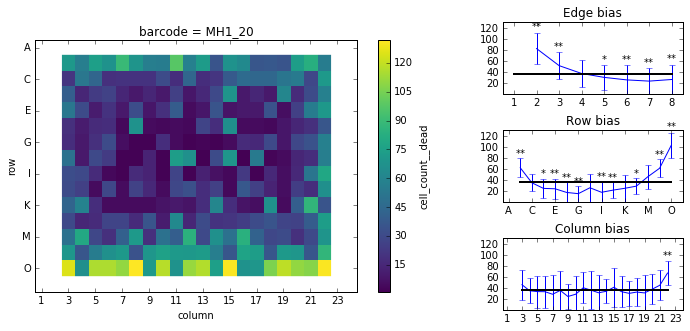

In [7]:
# QC for plate bias
qcfct.Plate_bias(xray, filename='OUTPUT/QC_report.pdf')
qcfct.Plate_bias(xray, variable='cell_count__dead', filename='OUTPUT/QC_report_deadcells.pdf')

In [4]:
# annotate the data 
df_annotated = TrtAnnot.add_treatments(
                    TrtAnnot.add_plate_info(df, 
                        pd.read_csv('../tests/drug_response_data/OUTPUT/Example1_plate_info.tsv', sep='\t')),
                             '../tests/drug_response_data/OUTPUT/')
df_annotated.iloc[range(840,5500,400),[0,4,5,9,10,12,13,14]]

,barcode,well,cell_count,cell_line,treatment_duration,agent,concentration,role
840,MH1_01,J11,481.0,CL_1,0,-,0.000000,untreated
1240,MH1_01,N11,468.0,CL_1,0,-,0.000000,untreated
240,MH1_11,D11,381.0,CL_1,72,D_1,0.316228,treatment
640,MH1_11,H11,557.0,CL_1,72,D_2,0.010000,treatment
1040,MH1_11,L11,262.0,CL_1,72,D_4,3.162278,treatment
40,MH1_06,B11,3507.0,CL_1,72,-,0.000000,negative_control
440,MH1_06,F11,514.0,CL_1,72,D_2,0.100000,treatment
840,MH1_06,J11,3607.0,CL_1,72,-,0.000000,negative_control
1240,MH1_06,N11,3405.0,CL_1,72,-,0.000000,negative_control
240,MH1_16,D11,3488.0,CL_1,72,D_4,0.010000,treatment


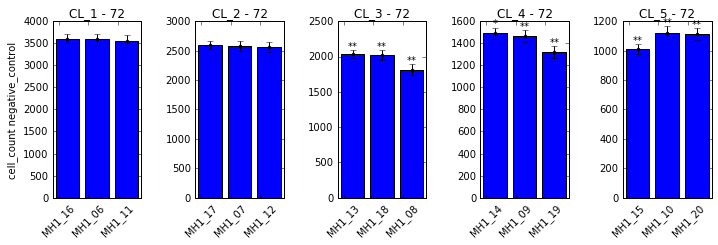

In [5]:
qcfct.Negative_control_bias(df_annotated, filename='OUTPUT/QC_report_negative_contols.pdf')